In [1]:
import json
import numpy as np
from collections import defaultdict, Counter
import string
from sklearn import linear_model
import sys
import nltk
from nltk.corpus import stopwords 

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yaojunyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import spacy

In [4]:
i=0
f_name = "Electronics_5_2018.json"
all_data = []
with open(f_name, 'r') as f:
    line = f.readline()
    #print(line)
    while line:
        if(i==70000):
            break
        data = json.loads(line)
        all_data.append(data)
        line = f.readline()
        i=i+1

In [5]:
all_data = all_data[:60000]

In [6]:
print(len(all_data))

60000


In [7]:
for i in all_data:
    if 'reviewText' not in i.keys() or 'overall' not in i.keys() or not i['reviewText'] or not i['overall']:
        all_data.remove(i)

In [8]:
print(len(all_data))

59991


In [9]:
def only_adj_and_noun(all_data):
    bigramCount = defaultdict(int)
    uniCount = defaultdict(int)
    punctuation = set(string.punctuation)
    stop_words = set(stopwords.words('english'))
    translator = str.maketrans('', '', string.punctuation)
    nlp=spacy.load("en_core_web_sm")

    review_text = []
    for d in all_data:
        #r = ''.join([c for c in d['reviewText'].lower() if not c in discard_set])
        r = d['reviewText'].translate(translator).lower()
        r = [word for word in r.split() if word not in stop_words and not word.isdigit()]

        review_text.append(" ".join(r))
        if r:
            prev = r[0]
            for i in range(1, len(r)):
                bigram = prev + " " + r[i]
                uniCount[r[i]] += 1
                bigramCount[bigram] += 1
                prev = r[i]
            uniCount[r[0]] += 1
    return uniCount, bigramCount, review_text

In [10]:
uni_count, bi_count, review_text = only_adj_and_noun(all_data)

In [11]:
print(len(bi_count), len(uni_count))

889953 54213


In [12]:
def feature(text, bigrams, bigramId):
    feat = [0]*len(bigrams)
    words = text.split()
    for i in range(len(words)-1):
        bigram = words[i] + " " + words[i+1]
        try:
            feat[bigramId[bigram]] += 1
        except KeyError:
            continue
    feat.append(1) #offset
    return feat

In [13]:
countsBigram = [(bi_count[d], d) for d in bi_count.keys()]
countsBigram.sort()
countsBigram.reverse()

In [14]:
bigrams = [c[1] for c in countsBigram[:1000]]
bigramId = dict(zip(bigrams, range(len(bigrams))))
bigramSet = set(bigrams)

In [15]:
print(review_text[1])

pages pages introspection style writers like henry james like kind novels writer occasionally delights descriptions observations way repetitious think parts could cut still preserving probably tightly crystallizing themes truths within story story could relate wish hadnt tedious read


In [16]:
X_2 = []
for i in range(len(all_data)):
    X_2.append(feature(review_text[i], bigrams, bigramId))
y_2 = [d['overall'] for d in all_data]

In [17]:
reg = 1.0
clf_bi = linear_model.Ridge(reg, fit_intercept=False)
clf_bi.fit(X_2, y_2)
theta_bi = clf_bi.coef_
pred_bi = clf_bi.predict(X_2)

In [18]:
max_index = np.argsort(theta_bi)[-100:][::-1]
print(len(theta_bi[max_index]))
print(theta_bi[max_index])
#print(np.array(bigrams)[max_index - 1])
tmp_bigram = np.array(bigrams)[max_index - 1]
print(tmp_bigram)


100
[4.30648727 0.49883218 0.49726094 0.45188421 0.44932131 0.44630682
 0.44291593 0.43226341 0.42636299 0.42451531 0.42156019 0.41529814
 0.41344005 0.40758722 0.40683915 0.40272513 0.39154912 0.38996935
 0.38949459 0.38942191 0.38879071 0.38618536 0.38614686 0.38226141
 0.38079957 0.38042649 0.37867917 0.37819546 0.37645581 0.37270519
 0.37017401 0.36988813 0.36900935 0.36345862 0.36328017 0.36166328
 0.36012383 0.3588544  0.35774068 0.35336426 0.35034939 0.34650633
 0.34618235 0.3459573  0.34082147 0.33926863 0.33813942 0.33693095
 0.33523801 0.33063601 0.32864873 0.32838248 0.32649112 0.32586113
 0.32420377 0.32375235 0.32250772 0.32235876 0.32235395 0.31950067
 0.3183491  0.3182647  0.3158721  0.31185648 0.31078518 0.31056598
 0.3043428  0.30295026 0.3018815  0.30169627 0.29602775 0.29268403
 0.29241907 0.29095975 0.28613408 0.28589933 0.28480578 0.28418705
 0.28147411 0.27987612 0.27877636 0.27846527 0.27801745 0.27801743
 0.27736084 0.27714833 0.27538927 0.27527548 0.27495986 0.

In [19]:
bi_dictionary = {}
for i in range(len(tmp_bigram)):
    bi_dictionary[tmp_bigram[i]]=theta_bi[max_index][i]

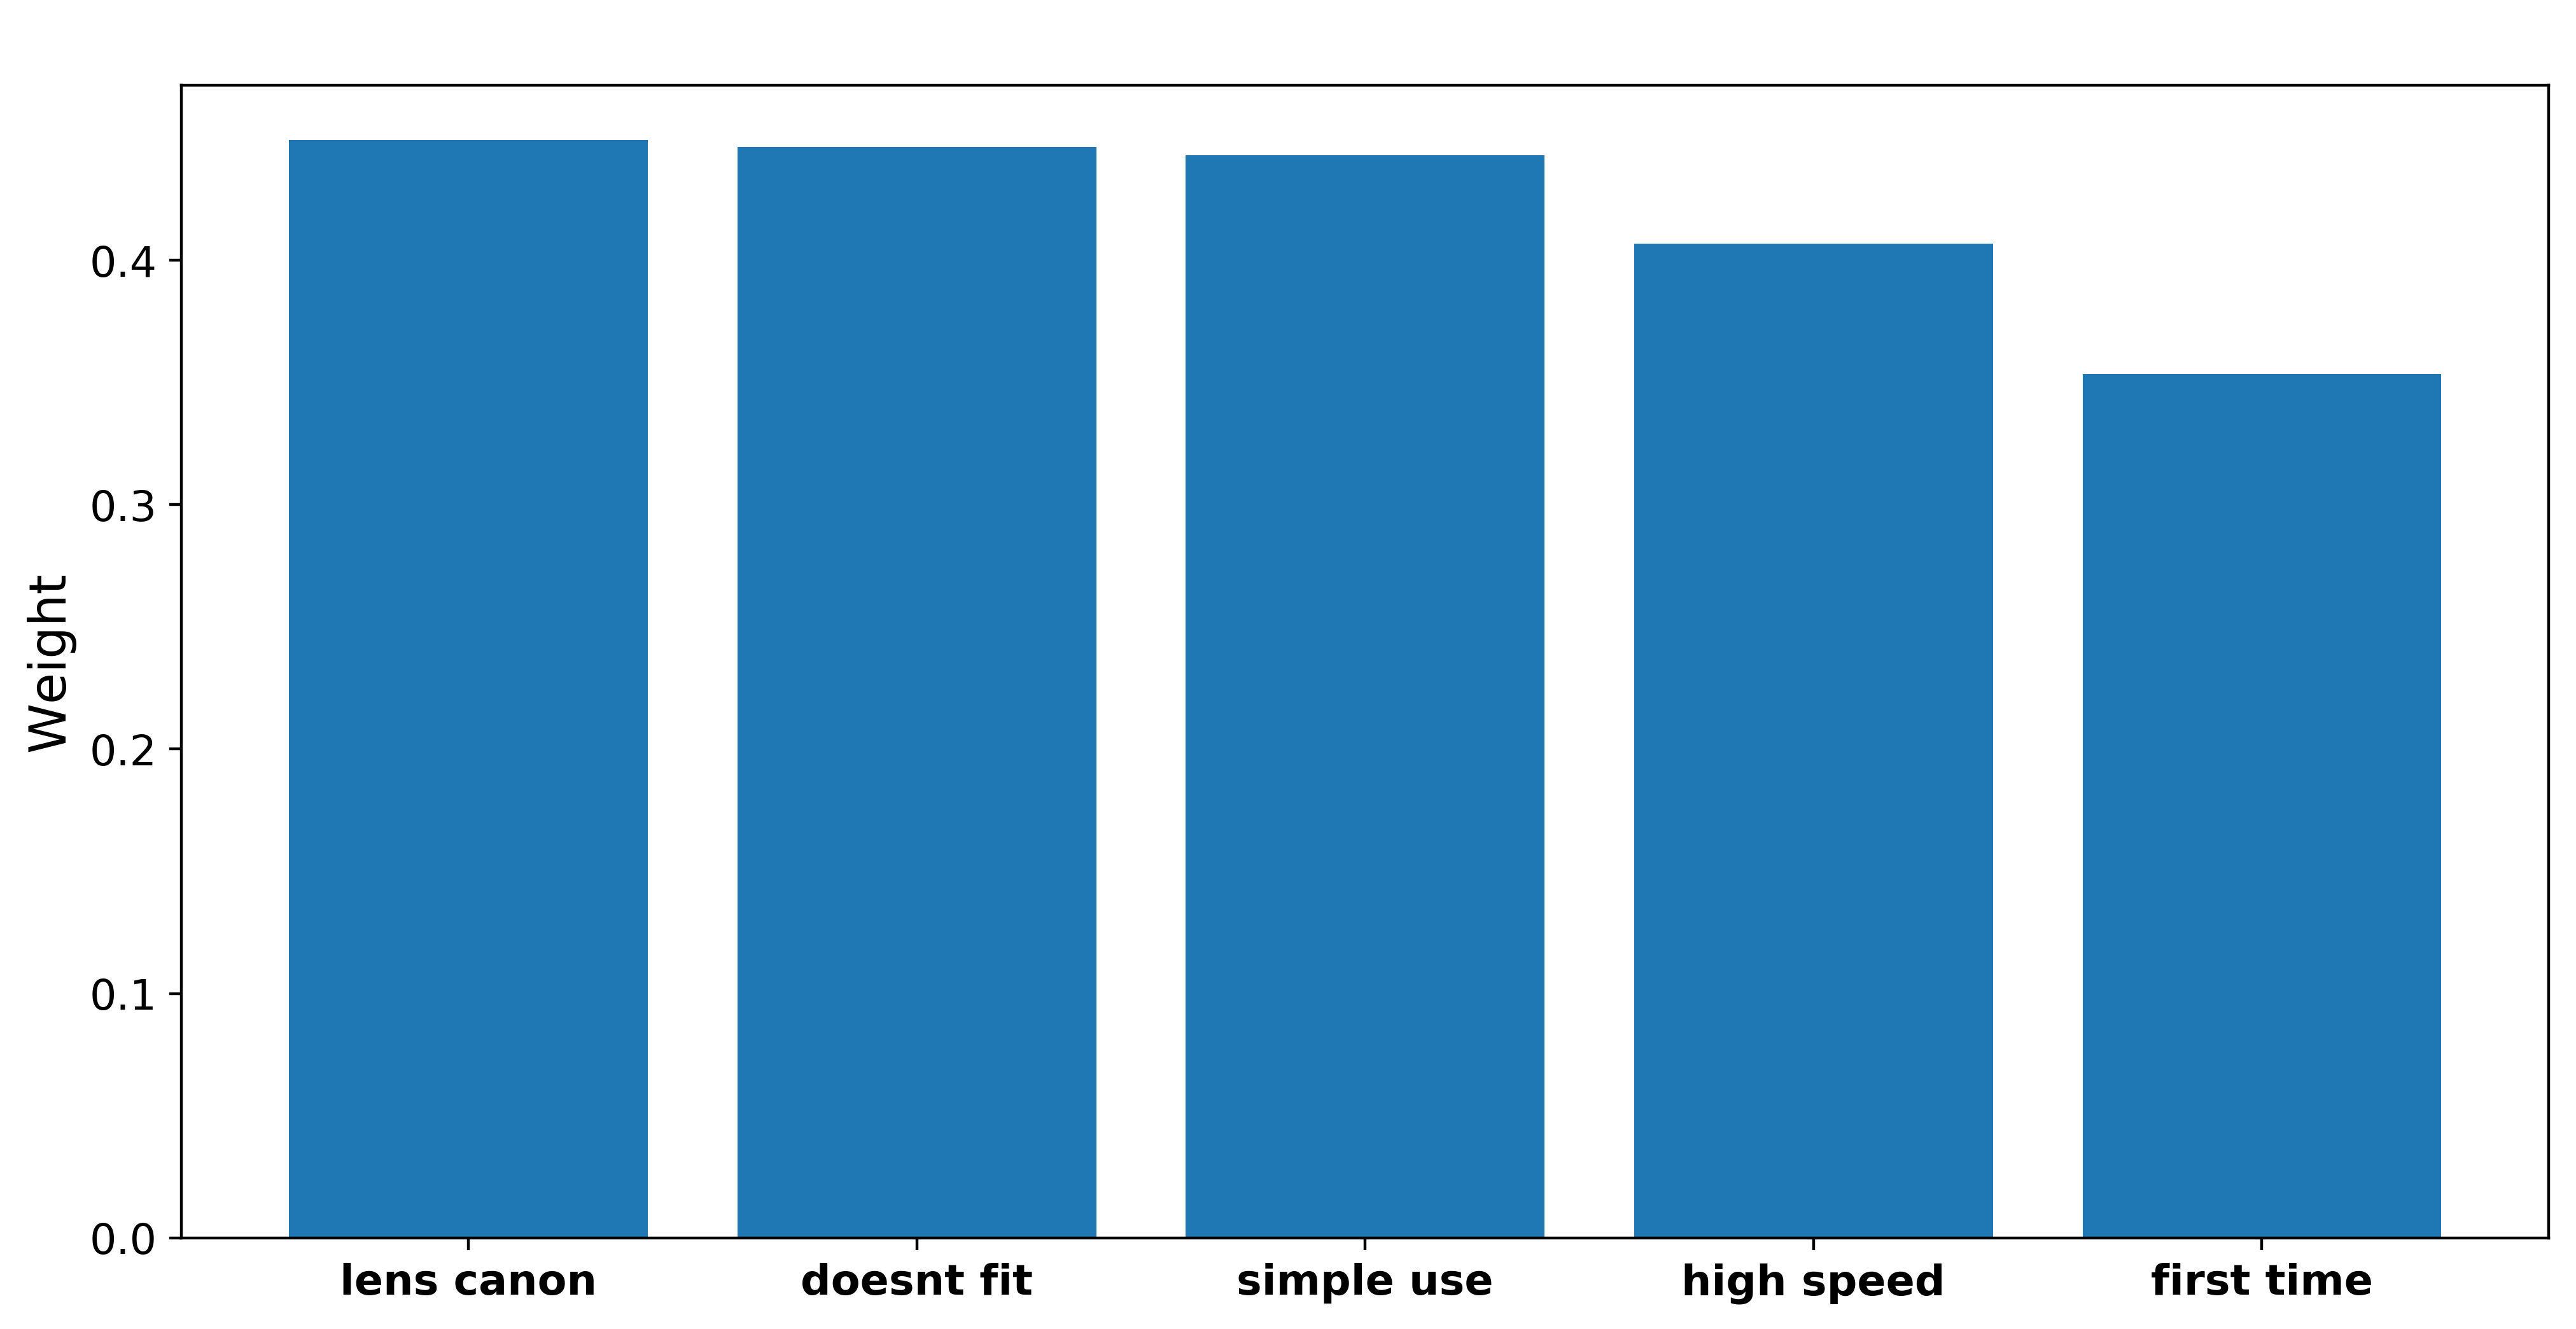

In [21]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pylab import subplots
import numpy as np
matplotlib.rcParams['axes.labelsize'] = 'large'
matplotlib.rcParams['font.size'] = 12.0
matplotlib.rcParams['figure.dpi'] = 400
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['xtick.color'] = 'black'
matplotlib.rcParams['ytick.color'] = 'black'
fig = plt.figure(figsize=(12, 6))
fig.patch.set_alpha(0);
ax = fig.add_subplot(111)
ax.patch.set_alpha(0);
plt.xticks(weight = 'bold')
x=np.array(['lens canon','doesnt fit','simple use','high speed','first time'])
y=np.array([bi_dictionary['lens canon'],bi_dictionary['doesnt fit'],bi_dictionary['simple use'],bi_dictionary['high speed'],bi_dictionary['first time']])
plt.bar(x,y)
plt.title("Top 5 important words for analysis and recommendation",color='white')
plt.xlabel("")
plt.ylabel('Weight')
plt.show()

#######################

In [22]:
countsUnigram = [(uni_count[w], w) for w in uni_count]
countsUnigram.sort()
countsUnigram.reverse()

In [23]:
unigrams = [x[1] for x in countsUnigram[:1000]]
unigramId = dict(zip(unigrams, range(len(unigrams))))
unigramSet = set(unigrams)

In [24]:
def feature_2(text, unigrams, unigramId):
    feat = [0]*len(unigrams)
    words = text.split()
    for i in words:
        #bigram = words[i] + " " + words[i+1]
        try:
            feat[unigramId[i]] += 1
        except KeyError:
            continue
    feat.append(1) #offset
    return feat

In [25]:
def feature_3(text):
    feat = [0]*len(combineds)
    words = text.split()
    for i in range(len(words)-1):
        bigram = words[i] + " " + words[i+1]
        try:
            feat[combinedId[bigram]] += 1
        except KeyError:
            continue
    for w in words:
        try:
            feat[combinedId[w]] += 1
        except KeyError:
            continue
    feat.append(1) #offset
    return feat

In [26]:
X_uni = []
for i in range(len(all_data)):
    X_uni.append(feature_2(review_text[i], unigrams, unigramId))
y_uni = [d['overall'] for d in all_data]

In [27]:
print(len(X_uni), len(y_uni))

59991 59991


In [28]:
reg = 1.0
clf_uni = linear_model.Ridge()
clf_uni.fit(X_uni, y_uni)
theta_uni = clf_uni.coef_
pred_uni = clf_uni.predict(X_uni)

In [29]:
max_index = np.argsort(theta_uni)[-200:][::-1]
print(len(theta_uni[max_index]))
print(theta_uni[max_index])
#print(np.array(bigrams)[max_index - 1])
tmp_uni = np.array(unigrams)[max_index - 1]
print(tmp_uni)

200
[0.36309917 0.33625982 0.29968798 0.29297368 0.2923997  0.28714743
 0.28672893 0.26817189 0.24788389 0.24606117 0.23798562 0.23478111
 0.23419394 0.23182124 0.22704819 0.22426016 0.22275221 0.21960129
 0.21890364 0.21572624 0.21313574 0.20664879 0.2029519  0.20244301
 0.19966612 0.19902091 0.18154183 0.18135312 0.1784691  0.17756497
 0.17339201 0.17251133 0.17083487 0.16814103 0.16370778 0.15644785
 0.15350544 0.15278556 0.14882924 0.14833241 0.14521893 0.14342998
 0.14185943 0.13717079 0.13716766 0.13657187 0.13572205 0.13482516
 0.13352993 0.13296125 0.13218513 0.13215439 0.13137361 0.1311636
 0.12525104 0.12398516 0.12389539 0.12352346 0.12348193 0.12317483
 0.12130263 0.11999589 0.11948336 0.11920408 0.11660248 0.11532191
 0.11422068 0.11404433 0.11389095 0.11285296 0.11098564 0.1095385
 0.10873027 0.10825824 0.107776   0.10774668 0.1069516  0.10571529
 0.10471821 0.10394084 0.10319091 0.10253698 0.10058141 0.09966789
 0.09963246 0.09948004 0.09891334 0.09786926 0.09776659 0.09

##### get low ratting data ####

In [30]:
########################################
#   not using for now                  #
########################################

# def get_bigrams(all_data, count):
#     bigramCount = defaultdict(int)
#     punctuation = set(string.punctuation)
#     for d in all_data:
#         r = ''.join([c for c in d['reviewText'].lower() if not c in punctuation])
#         words = r.split()
#         for i in range(0,len(words)-1):
#             bigram = words[i] + " " + words[i+1]
#             bigramCount[bigram] += 1
#     countsBigram = [(bigramCount[d], d) for d in bigramCount.keys()]
#     countsBigram.sort()
#     countsBigram.reverse()
#     bigrams = [c[1] for c in countsBigram[:count]]
#     bigramId = dict(zip(bigrams, range(len(bigrams))))
#     bigramSet = set(bigrams)
#     return bigramId, bigramSet, countsBigram

# def get_unigrams(all_data, count):
#     unigramCount = defaultdict(int)
#     for d in all_data:
#         r = ''.join([c for c in d['reviewText'].lower() if not c in punctuation])
#         for w in r.split():
#             unigramCount[w] += 1
#     countsUnigram = [(unigramCount[w], w) for w in unigramCount]
#     countsUnigram.sort()
#     countsUnigram.reverse()
#     unigrams = [x[1] for x in countsUnigram[:count]]
#     unigramId = dict(zip(unigrams, range(len(unigrams))))
#     unigramSet = set(unigrams)
#     return unigramId, unigramSet, countsUnigram

# def get_training_data(all_data, review_text):
#     X = []
#     for i in range(len(all_data)):
#         X.append(feature_3(review_text[i]))
#     y = [d['overall'] for d in all_data]
#     return X, y

In [31]:
def data_by_low_rating(all_data, rating):
    ratings_data = []
    for d in all_data:
        if d['overall'] == rating:
            ratings_data.append(d)
    #print(len(ratings_data))
    return ratings_data

low_ratings = data_by_low_rating(all_data, 1.0)
#reviewText_low = [''.join([c for c in datum['reviewText'].lower() if not c in punctuation]) for datum in low_ratings]

In [32]:
low_uni_count, low_bi_count, low_reviews = only_adj_and_noun(low_ratings)

In [33]:
low_uni_count, low_bi_count = Counter(low_uni_count), Counter(low_bi_count)

In [34]:
print(low_uni_count.most_common(50))

[('one', 1160), ('would', 869), ('filter', 841), ('work', 812), ('get', 807), ('product', 746), ('lens', 673), ('even', 651), ('use', 628), ('dont', 600), ('bought', 559), ('like', 557), ('time', 540), ('good', 533), ('quality', 528), ('back', 527), ('buy', 522), ('cable', 509), ('got', 439), ('im', 417), ('amazon', 412), ('used', 404), ('money', 401), ('new', 401), ('could', 379), ('well', 378), ('problem', 367), ('better', 364), ('unit', 360), ('didnt', 353), ('first', 345), ('cheap', 343), ('much', 341), ('return', 327), ('two', 322), ('also', 320), ('tried', 317), ('sound', 310), ('camera', 305), ('thing', 303), ('doesnt', 298), ('card', 297), ('using', 296), ('ive', 295), ('case', 294), ('way', 288), ('really', 283), ('never', 278), ('great', 273), ('bad', 272)]


In [35]:
print(low_bi_count.most_common(50))

[('waste money', 114), ('customer service', 96), ('dont know', 95), ('didnt work', 91), ('doesnt work', 81), ('dont buy', 79), ('uv filter', 76), ('tech support', 65), ('stopped working', 64), ('sound quality', 60), ('case logic', 58), ('would recommend', 57), ('dont waste', 56), ('cheap cheap', 55), ('even though', 51), ('would work', 49), ('piece junk', 48), ('years ago', 48), ('much better', 47), ('get pay', 46), ('new one', 45), ('poor quality', 42), ('im sure', 41), ('brand new', 41), ('sent back', 41), ('save money', 41), ('waste time', 40), ('make sure', 40), ('read reviews', 39), ('barnes noble', 39), ('could get', 38), ('first time', 37), ('every time', 36), ('didnt even', 32), ('thought would', 32), ('im going', 32), ('stay away', 32), ('volume control', 31), ('never buy', 30), ('dvd player', 30), ('looks like', 29), ('send back', 29), ('one star', 29), ('bought one', 28), ('bought two', 28), ('credit card', 28), ('one day', 28), ('something else', 28), ('several times', 28),

In [36]:
low_dictionary = dict(low_bi_count.most_common(100))

In [38]:
f=""
for i in low_dictionary.keys():
    temp = i * low_dictionary[i]
    f = f + temp

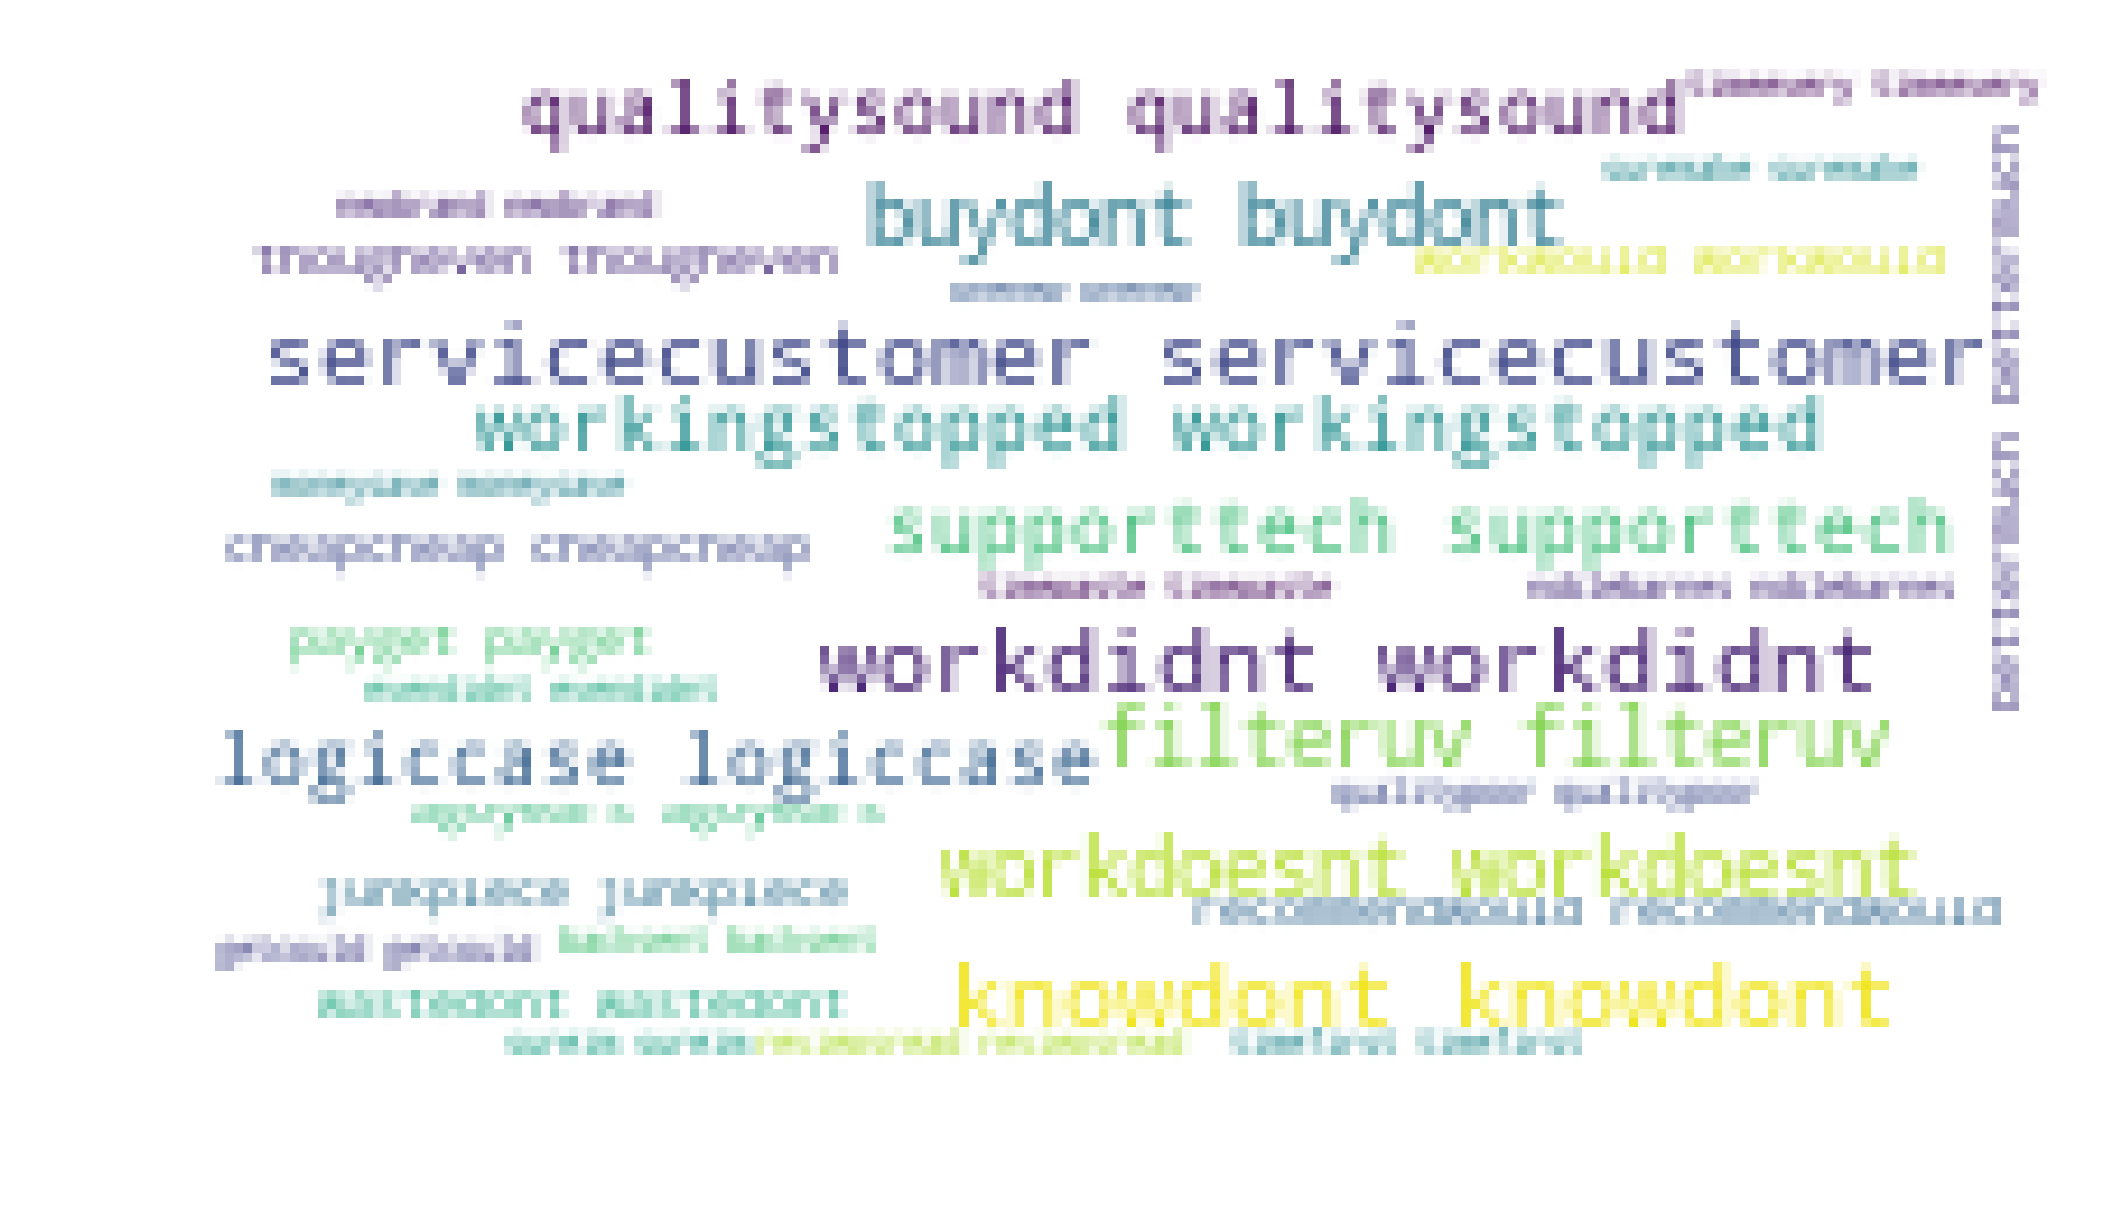

In [39]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=200, height=110, margin=2).generate(f)
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('test.png')

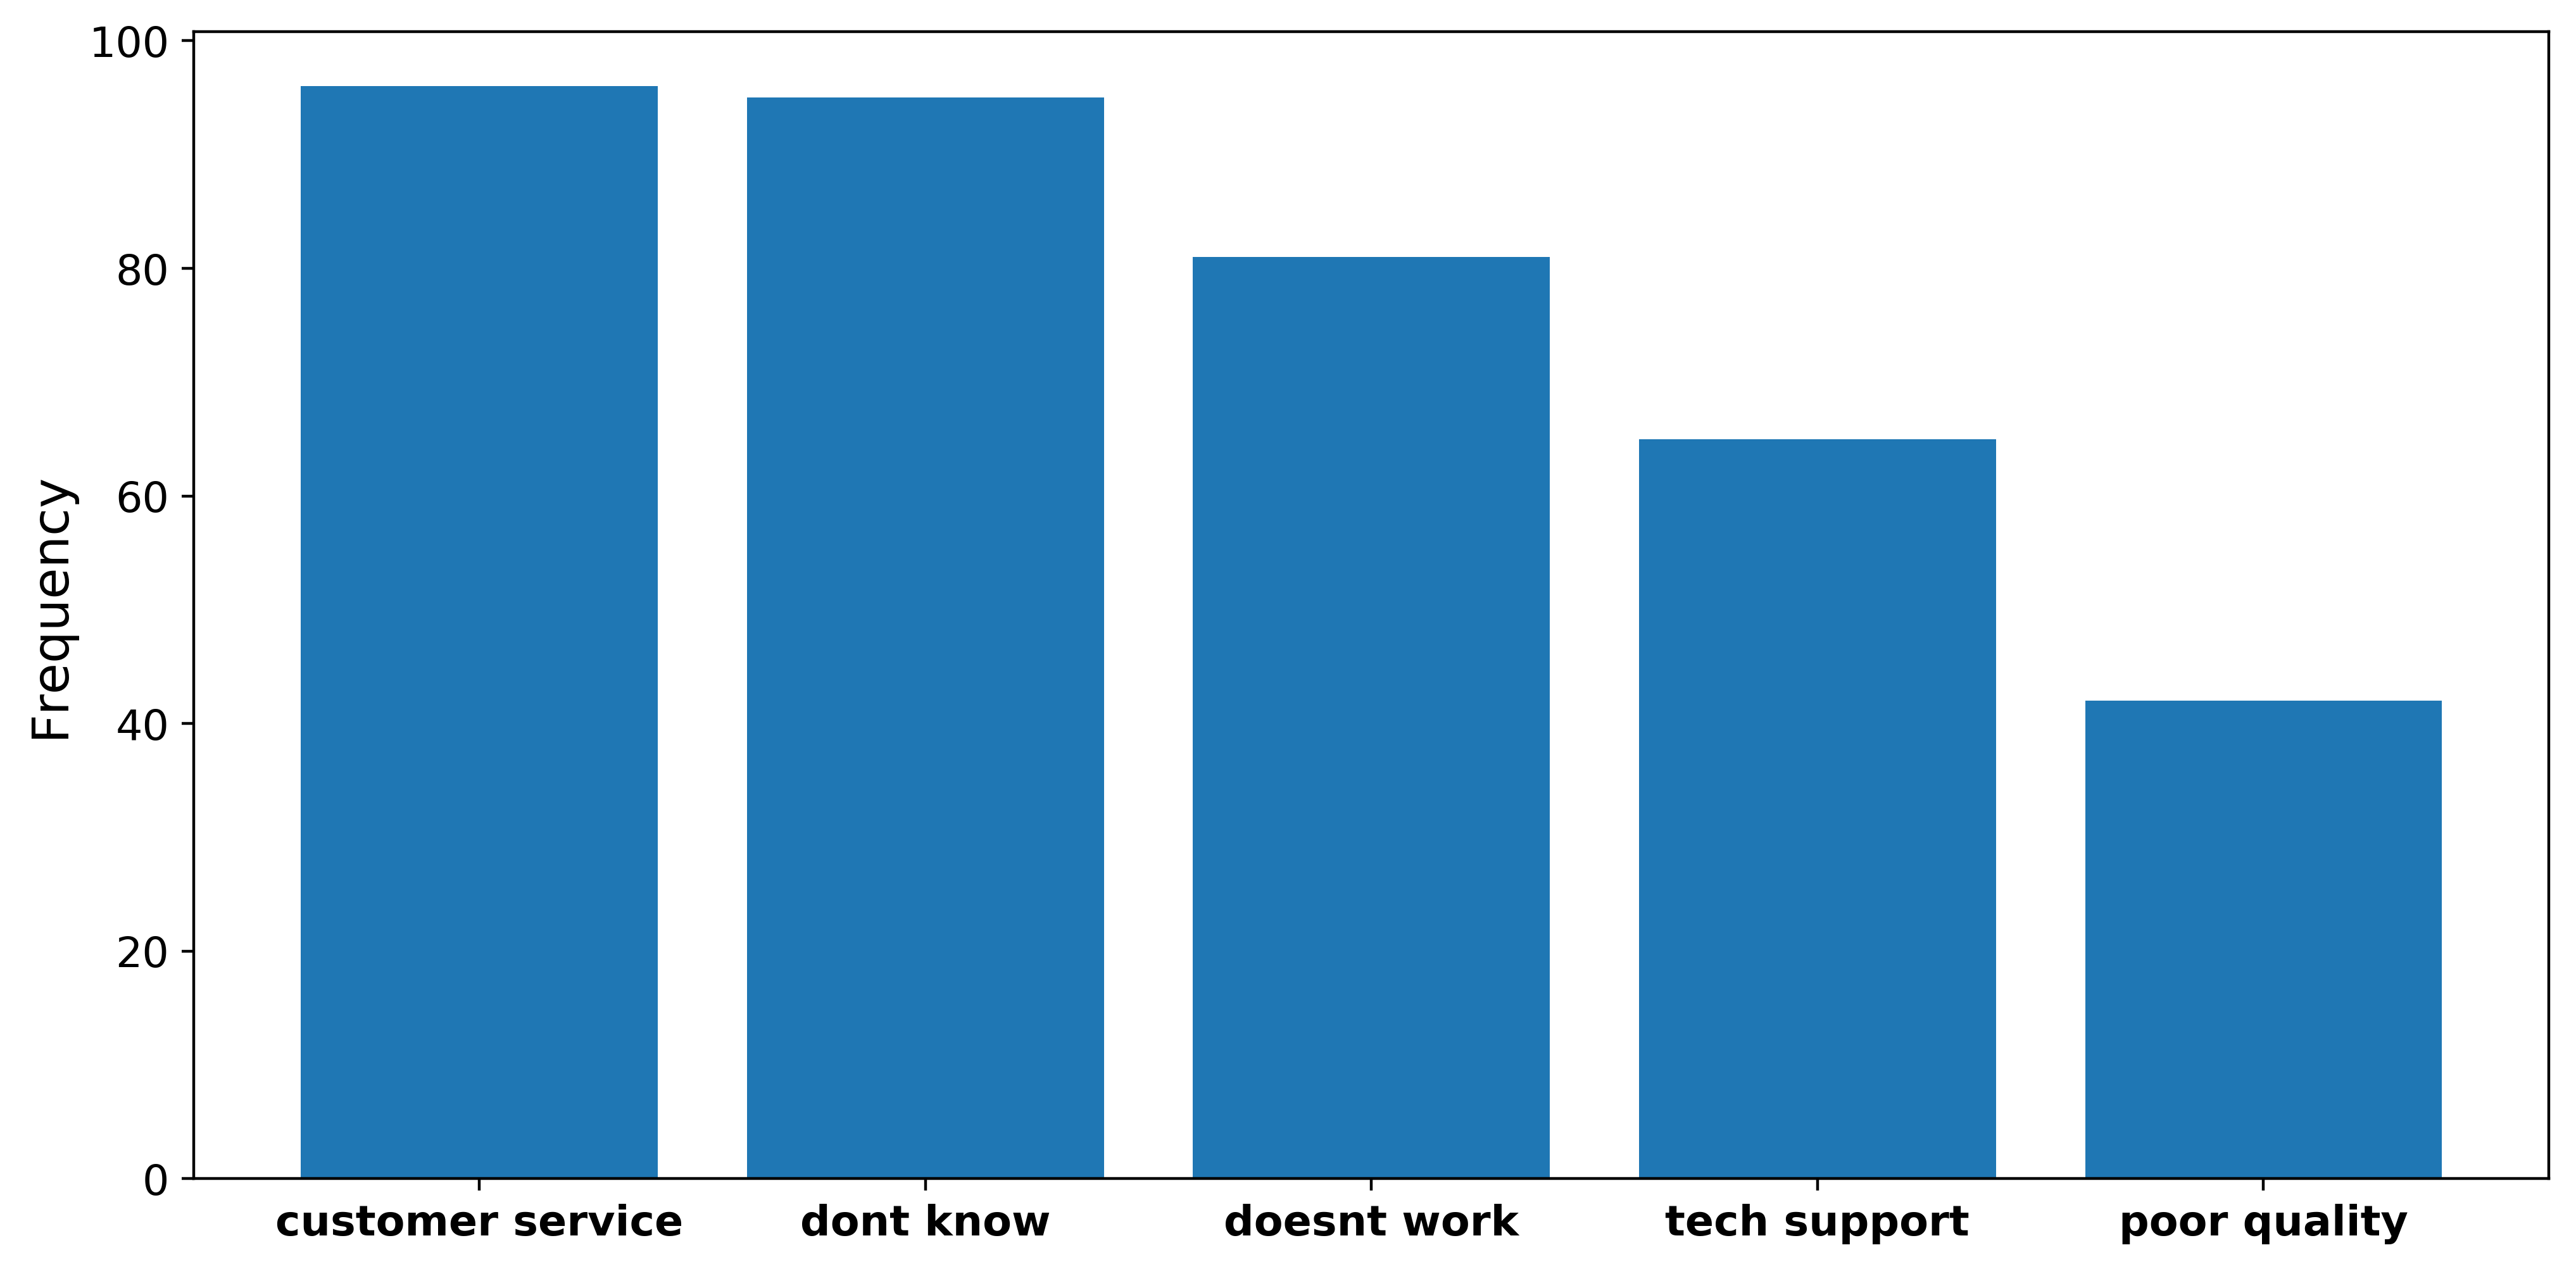

In [29]:
matplotlib.rcParams['axes.labelsize'] = 'large'
matplotlib.rcParams['font.size'] = 12.0
matplotlib.rcParams['figure.dpi'] = 400
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['xtick.color'] = 'black'
matplotlib.rcParams['ytick.color'] = 'black'
fig = plt.figure(figsize=(12, 6))
fig.patch.set_alpha(0);
ax = fig.add_subplot(111)
ax.patch.set_alpha(0);
plt.xticks(weight = 'bold')
x_low=np.array(['customer service','dont know','doesnt work','tech support','poor quality'])
y_low=np.array([96,95,81,65,42])
plt.bar(x_low,y_low)
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

Get high rating data(5 stars)

In [96]:
def data_by_high_rating(all_data, rating):
    ratings_data = []
    for d in all_data:
        if d['overall'] == rating:
            ratings_data.append(d)
    #print(len(ratings_data))
    return ratings_data

high_ratings = data_by_high_rating(all_data, 5.0)

In [97]:
high_uni_count, high_bi_count, high_reviews = only_adj_and_noun(high_ratings)

In [98]:
high_uni_count, high_bi_count = Counter(high_uni_count), Counter(high_bi_count)

In [99]:
print(high_uni_count.most_common(50))

[('great', 13898), ('good', 9843), ('lens', 9609), ('one', 8791), ('use', 8148), ('works', 7559), ('well', 6727), ('quality', 6402), ('price', 6271), ('like', 5940), ('camera', 4933), ('get', 4932), ('product', 4881), ('sound', 4791), ('would', 4724), ('cable', 4692), ('headphones', 4579), ('bought', 4115), ('filter', 3930), ('dont', 3808), ('much', 3796), ('used', 3744), ('time', 3631), ('also', 3615), ('buy', 3592), ('ive', 3558), ('really', 3447), ('need', 3359), ('work', 3269), ('using', 3172), ('im', 3088), ('easy', 3062), ('better', 2964), ('even', 2881), ('nice', 2849), ('still', 2829), ('years', 2736), ('little', 2664), ('perfect', 2659), ('love', 2644), ('best', 2580), ('excellent', 2500), ('power', 2432), ('recommend', 2412), ('want', 2391), ('got', 2341), ('long', 2309), ('needed', 2305), ('new', 2296), ('without', 2287)]


In [100]:
print(high_bi_count.most_common(50))

[('works great', 2227), ('works well', 1032), ('great product', 930), ('good quality', 904), ('great price', 896), ('sound quality', 800), ('highly recommend', 752), ('good price', 620), ('easy use', 609), ('well made', 606), ('would recommend', 590), ('uv filter', 561), ('high quality', 556), ('works fine', 546), ('good product', 463), ('protect lens', 445), ('works perfectly', 430), ('much better', 427), ('surge protector', 402), ('work great', 393), ('highly recommended', 381), ('ive used', 371), ('worked great', 367), ('years ago', 363), ('tripp lite', 359), ('go wrong', 338), ('digital camera', 335), ('make sure', 332), ('work well', 328), ('would buy', 326), ('great quality', 321), ('dont know', 313), ('sound great', 310), ('easy install', 300), ('long time', 297), ('datahookproductlinklinked classalinknormal', 292), ('great sound', 290), ('cant beat', 287), ('works like', 285), ('excellent product', 276), ('well worth', 274), ('camera lens', 269), ('another one', 268), ('great v

In [57]:
type(high_uni_count)

collections.Counter

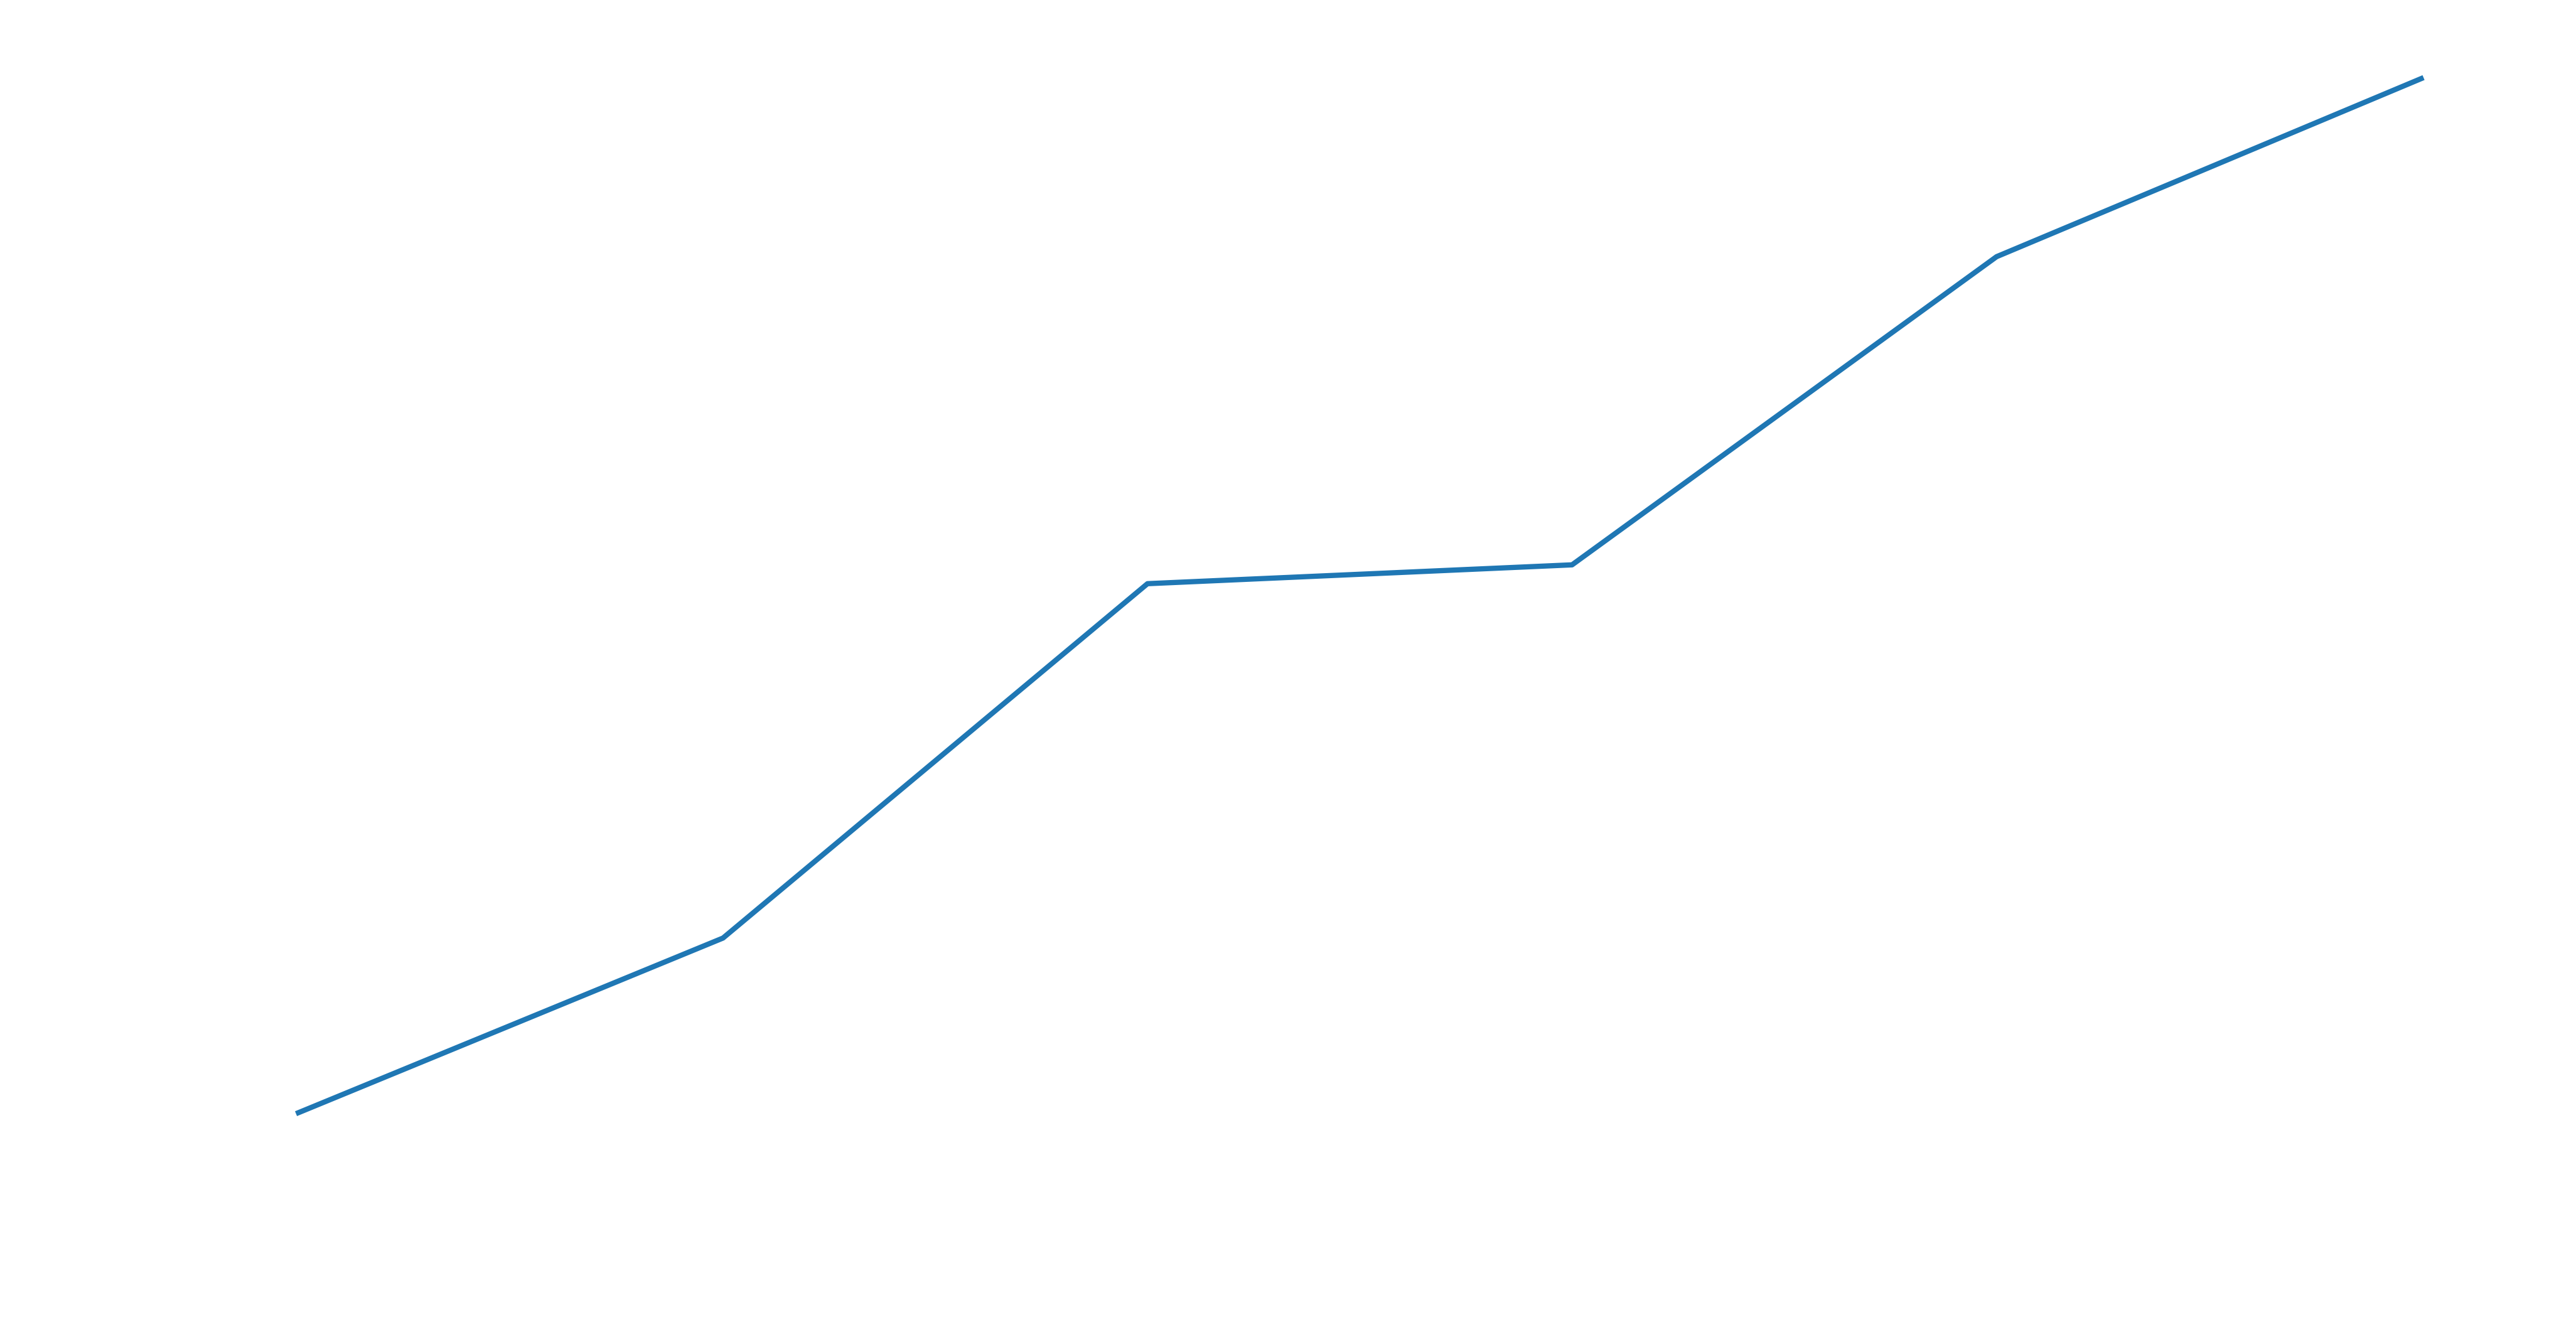

In [103]:
plt.figure(figsize=(12, 6))
x=np.array(['easy install','surge protector','easy use','good price','sound quality','good quality'])
y=np.array([300,402,609,620,800,904])
plt.plot(x,y)
plt.xlabel('Top 6 important words for high rating')
plt.ylabel('Frequency')
plt.show()

In [101]:
x_2014=np.array(['easy install','surge protector','easy use','good price','sound quality','good quality'])
y_2014=np.array([411,495,974,521,1457,759])

Text(0,0.5,'Frequency')

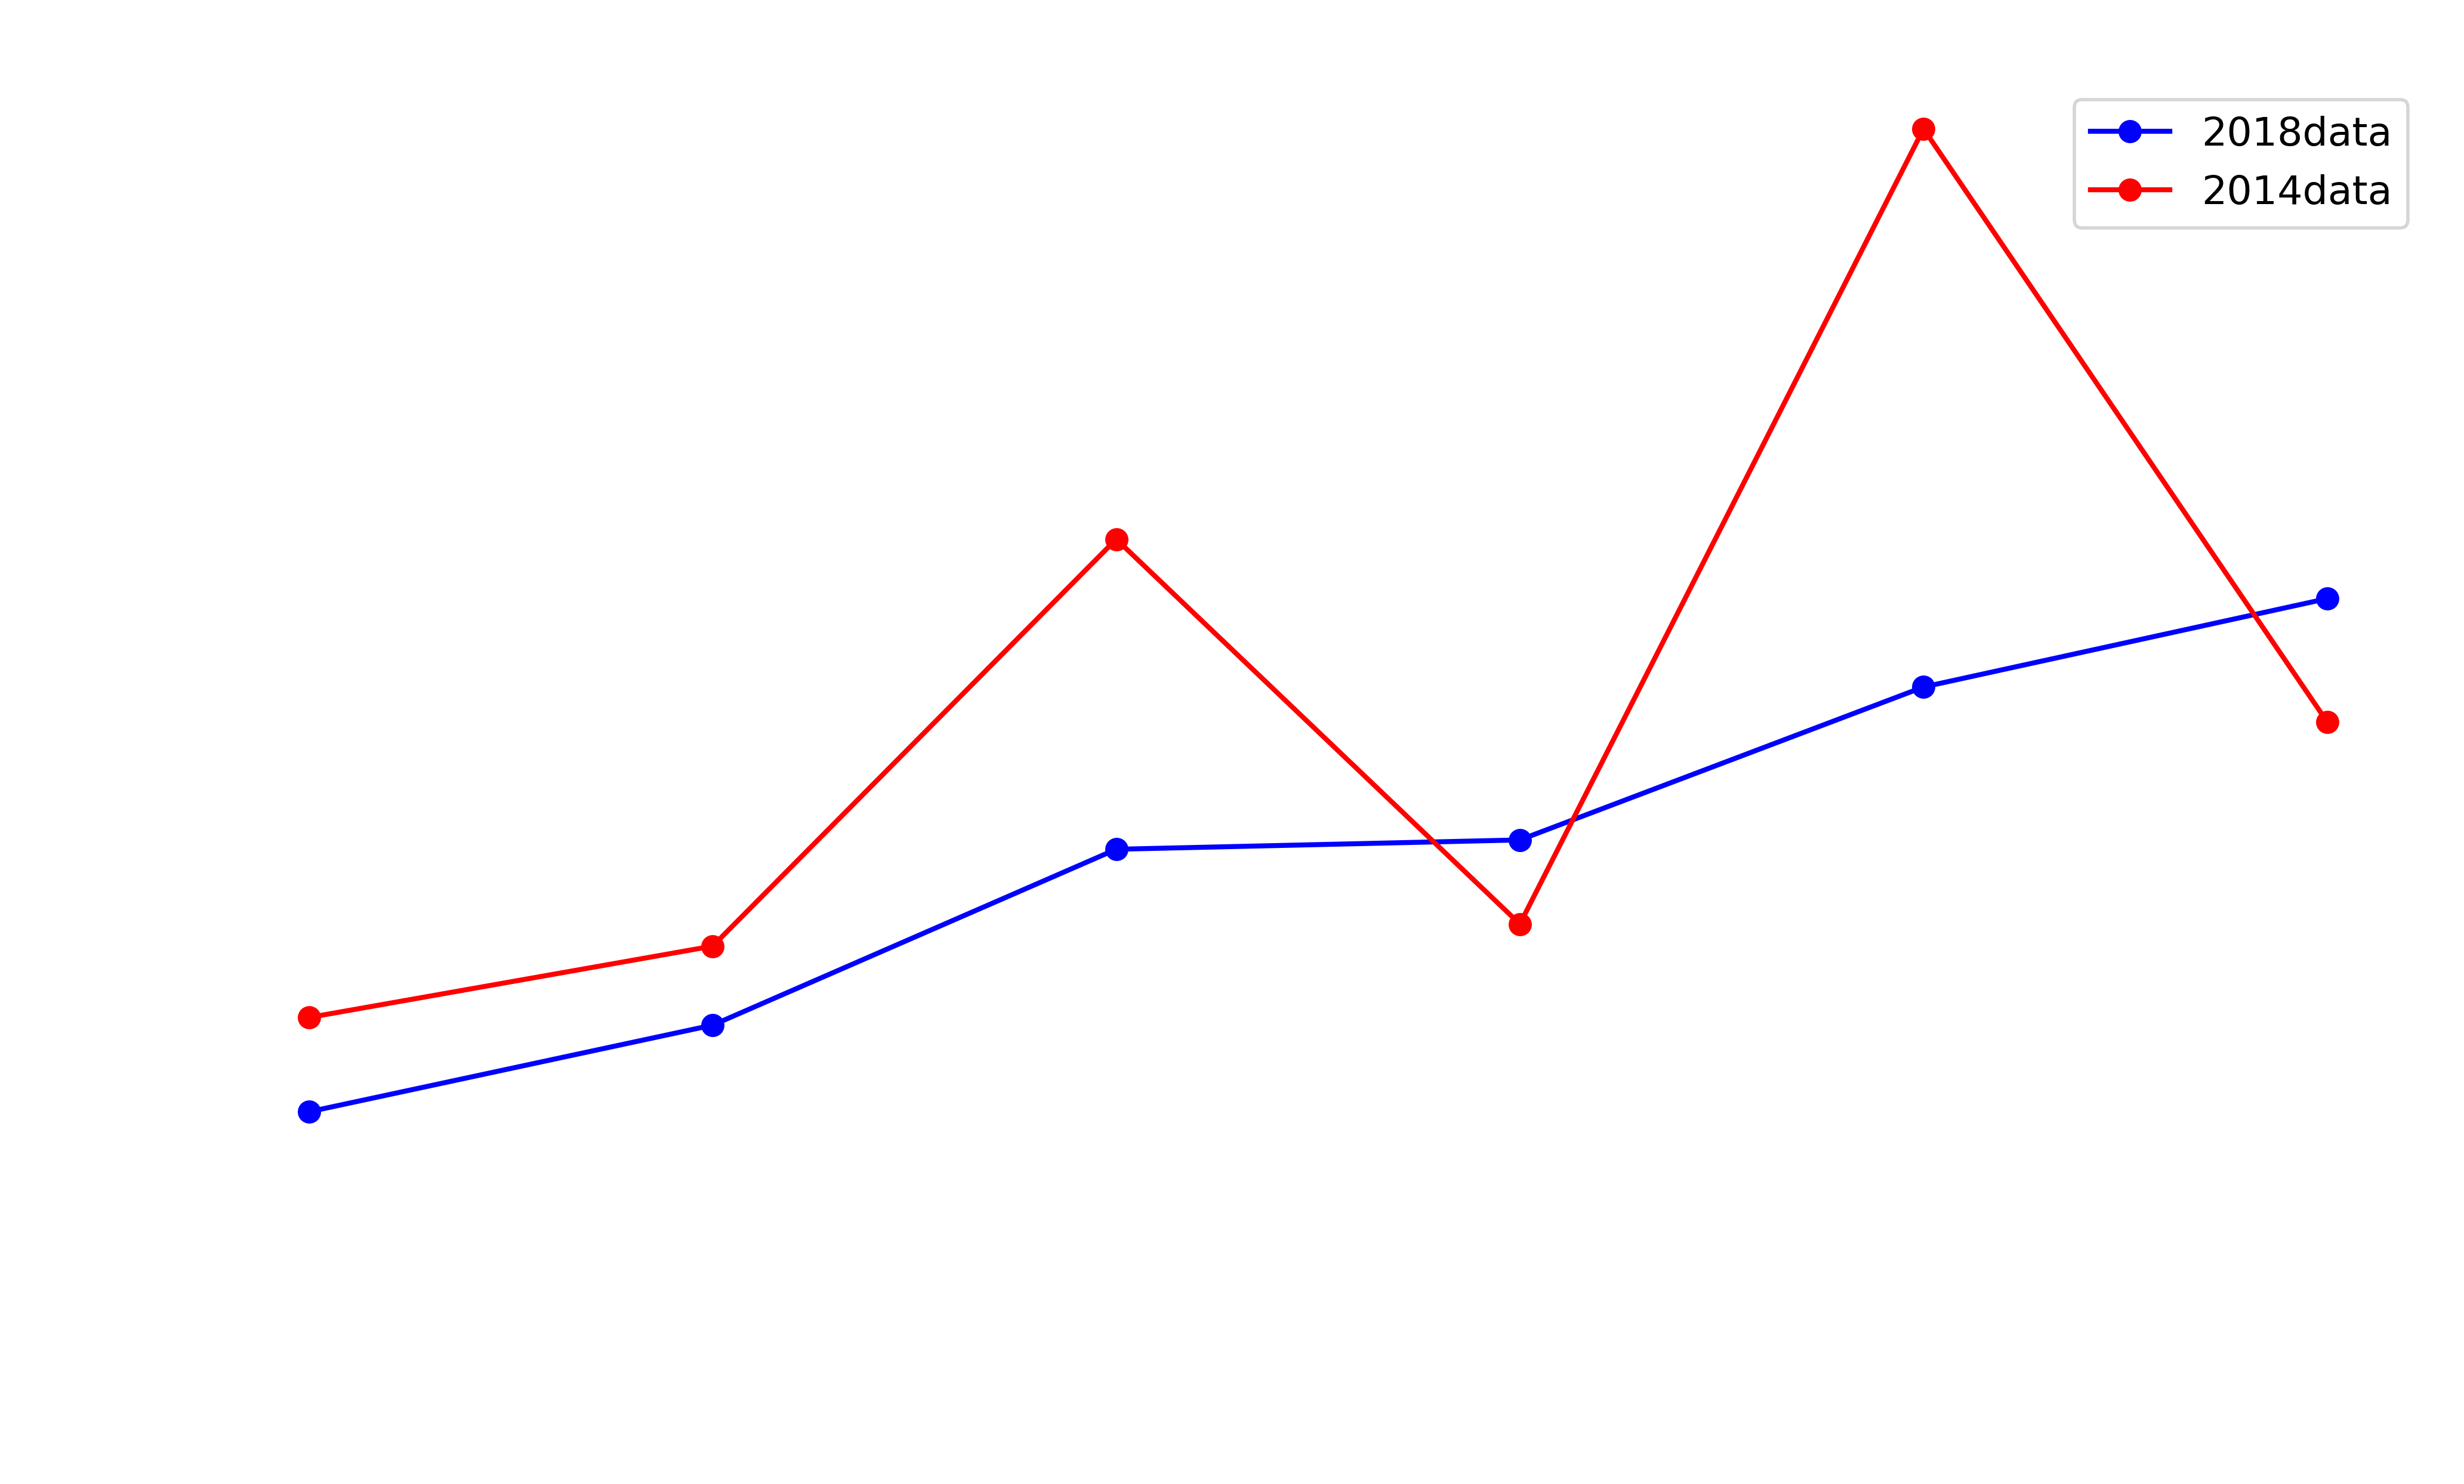

In [105]:
from matplotlib.pylab import subplots
matplotlib.rcParams['axes.labelsize'] = 'large'
matplotlib.rcParams['font.size'] = 12.0
matplotlib.rcParams['figure.dpi'] = 400
matplotlib.rcParams['axes.labelcolor'] = 'white'
matplotlib.rcParams['axes.edgecolor'] = 'white'
matplotlib.rcParams['xtick.color'] = 'white'
matplotlib.rcParams['ytick.color'] = 'white'
fig = plt.figure(figsize=(12, 6))
fig.patch.set_alpha(0);
ax = fig.add_subplot(111)
ax.patch.set_alpha(0);
plt.xticks(rotation = 45,weight = 'bold')
ax.plot(x,y,'b-o',x_2014,y_2014,'r-o')
ax.legend(('2018data','2014data'),loc='best')
plt.title("Frequency differnt of Top 6 important words of high rating",color='white')
plt.xlabel('')
plt.ylabel('Frequency')